# Описание проекта 

**Цель исследования** - выявить причины убыточности приложения Procrastinate Pro+ и оценить эффективность рекламных каналов, стоимость привлечения клиентов и сроки окупаемости, чтобы предложить рекомендации для выхода компании на прибыль

**План работы**
1.	Подготовка данных
	•	Загрузка и объединение данных о визитах, заказах и расходах.
	•	Проверка данных на пропуски и дубликаты.
	•	Приведение названий колонок и форматов дат к единому виду.
	2.	Формирование пользовательских профилей
	•	Определение даты первого визита пользователя.
	•	Добавление характеристик: устройство, регион, канал привлечения.
	•	Определение статуса платящего пользователя.
	•	Расчёт стоимости привлечения (CAC).
	3.	Расчёт ключевых метрик
	•	Lifetime Value (LTV).
	•	Return on Investment (ROI).
	•	Конверсия.
	•	Retention (удержание).
	4.	Визуализация данных
	•	Динамика LTV, CAC и ROI.
	•	Тепловые карты конверсии по устройствам, регионам и каналам.
	•	Кривые удержания пользователей.
	5.	Анализ результатов
	•	Оценка окупаемости рекламы в целом.
	•	Определение устройств, регионов и каналов с низкой эффективностью.
	•	Выявление причин неэффективности (высокая стоимость привлечения, низкое удержание или слабая конверсия).
	6.	Выводы и рекомендации
	•	Формулировка итогов анализа окупаемости рекламы.
	•	Определение факторов, снижающих эффективность привлечения.
	•	Разработка рекомендаций для отдела маркетинга по оптимизации бюджета и повышению удержания пользователей.

**Описание данных** 

1. visits_info_short.csv — лог сессий пользователей:
   * user_id — идентификатор пользователя,
   * region — страна,
   * device — тип устройства,
   * channel — рекламный канал,
   * session_start — дата и время начала сессии,
   * session_end — дата и время окончания сессии.


2. orders_info_short.csv — покупки:
   * user_id — идентификатор пользователя,
   * event_dt — дата и время покупки,
   * revenue — сумма заказа.


3. costs_info_short.csv — рекламные расходы:
   * dt — дата кампании,
   * channel — рекламный канал,
   * cost — сумма расходов.

In [1]:
import pandas as pd 
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Загрузка данных
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs  = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
# Проверка общей информации
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

	•	visits — 309 901 строк, 6 колонок
	•	orders — 40 212 строк, 3 колонки
	•	costs — 1 800 строк, 3 колонки

In [4]:
# Проверка пропусков
print(visits.isna().sum())
print(orders.isna().sum())
print(costs.isna().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
User Id     0
Event Dt    0
Revenue     0
dtype: int64
dt         0
Channel    0
costs      0
dtype: int64


Пропусков во всех трёх датасетах нет.

In [5]:
# Проверка дубликатов
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Полных дубликатов строк в данных нет.

In [6]:
# Приведение названий колонок к единому стилю
visits = visits.rename(columns={
    'User Id':'user_id',
    'Region':'region',
    'Device':'device',
    'Channel':'channel',
    'Session Start':'session_start',
    'Session End':'session_end'
})

orders = orders.rename(columns={
    'User Id':'user_id',
    'Event Dt':'event_dt',
    'Revenue':'revenue'
})

costs = costs.rename(columns={
    'Channel':'channel',
    'costs':'cost'
})

Названия колонок приведены к змеиному регистру, что облегчает работу и объединение таблиц.

In [7]:
# Приведение типов данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Все колонки с датами преобразованы в datetime64

In [8]:
# Финальная проверка
display(visits.dtypes)
display(orders.dtypes)
display(costs.dtypes)

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

dt          object
channel     object
cost       float64
dtype: object

# Промежуточные выводы

* Пропуски и полные дубликаты во всех таблицах отсутствуют.
* Все названия колонок приведены к единому стилю (snake_case), что упростит работу и объединение таблиц.
* Колонки с датами преобразованы в формат datetime64[ns], числовые значения (revenue, cost) имеют корректный тип float64.


# Функции для расчёта и анализа LTV, ROI, удержания и конверсии

In [9]:
def get_profiles(visits, orders, costs):
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({
            'session_start': 'first', 
            'channel': 'first',
            'region': 'first',
            'device': 'first'
        })
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # признак платящего пользователя
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # новые пользователи
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем расходы с новыми пользователями
    merged = costs.merge(new_users, on=['dt', 'channel'], how='left')
        
    # CAC
    merged['CAC'] = merged['cost'] / merged['unique_users']
    
    # добавляем CAC в профили
    profiles = profiles.merge(
        merged[['dt', 'channel', 'CAC']],
        on=['dt', 'channel'],
        how='left'
    )
    
    profiles['CAC'] = profiles['CAC'].fillna(0) 

    return profiles

In [10]:
# Функция для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:
# Функция для для подсчёта конверсии
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
# Функция для подсчёта LTV
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )

    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # добавляем покупки в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # если dimensions пустой — считаем всё в одну когорту
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = ['cohort']

    # вспомогательная функция
    def group_by_dimensions(df, dims, horizon_days):
        # таблица LTV
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',
            aggfunc='sum'
        ).fillna(0).cumsum(axis=1)

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # считаем LTV
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        # считаем CAC
        cac = df[['user_id', 'CAC'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'CAC': 'mean'})
            .rename(columns={'CAC': 'cac'})
        )

        # считаем ROI
        roi = result.div(cac['cac'], axis=0)
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    # считаем LTV и ROI по выбранным измерениям
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # считаем динамику LTV и ROI
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,       # сырые данные
        result_grouped,   # таблица LTV
        result_in_time,   # динамика LTV
        roi_grouped,      # таблица ROI
        roi_in_time       # динамика ROI
    )

In [13]:
# Функция для сглаживания данных
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [14]:
# Функция для построения графика Retention Rate
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(30, 20))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [15]:
# Функция для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [16]:
# Функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Исследовательский анализ данных

In [17]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
# создаём профили 
profiles = get_profiles(visits, orders, costs)

In [18]:
# находим минимальную и максимальную даты привлечения пользователей
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print('Минимальная дата привлечения:', min_date)
print('Максимальная дата привлечения:', max_date)

Минимальная дата привлечения: 2019-05-01
Максимальная дата привлечения: 2019-10-27


Минимальная дата привлечения пользователей — 2019-05-01, максимальная — 2019-10-27.
Таким образом, данные охватывают полугодовой период (с мая по октябрь 2019 года), что позволяет анализировать поведение пользователей в разрезе нескольких месяцев и когорт.

In [19]:
# считаем количество пользователей и долю платящих из каждой страны.
region_stat = (
    profiles.groupby('region')
    .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
    .sort_values(by=('payer', 'mean'), ascending=False)
)

display(region_stat)

user_id payer          
              nunique   sum      mean
region                               
United States  100002  6902  0.069019
Germany         14981   616  0.041119
UK              17575   700  0.039829
France          17450   663  0.037994

Больше всего пользователей приложения приходит из США — более 100 тыс. человек. При этом доля платящих составляет около 6,9%, что выше, чем в других странах.

В Великобритании (≈17,6 тыс. пользователей) и Франции (≈17,5 тыс. пользователей) доля платящих ниже — около 4%. В Германии (≈15 тыс. пользователей) доля платящих немного выше, чем в UK и Франции — около 4,1%, но всё равно заметно ниже, чем в США.

Таким образом, США являются ключевым рынком приложения как по числу пользователей, так и по числу платящих клиентов.

In [20]:
# считаем количество пользователей и долю платящих  для каждого устройства
device_stat = (
    profiles.groupby('device')
    .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
    .sort_values(by=('payer', 'mean'), ascending=False))

display(device_stat)

user_id payer          
        nunique   sum      mean
device                         
Mac       30042  1912  0.063644
iPhone    54479  3382  0.062079
Android   35032  2050  0.058518
PC        30455  1537  0.050468

Пользователи чаще всего заходят в приложение с iPhone — более 54 тыс. человек. Далее идут Android (≈35 тыс.), PC (≈30 тыс.) и Mac (≈30 тыс.).

По доле платящих:
* Mac показывает самую высокую конверсию в платящих — около 6,4%,
* за ним идут iPhone — 6,2%,
* затем Android — 5,9%,
* наименьшая доля у PC — 5,0%.

Таким образом, основная масса клиентов пользуется iPhone, но самые «платёжеспособные» сегменты — это владельцы Mac и iPhone.

In [21]:
# считаем количество и долю платящих пользователей для каждого канала привлечения.
channel_stat = (
    profiles.groupby('channel')
    .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
    .sort_values(by=('payer', 'mean'), ascending=False))

display(channel_stat)

user_id payer          
                   nunique   sum      mean
channel                                   
FaceBoom             29144  3557  0.122049
AdNonSense            3880   440  0.113402
lambdaMediaAds        2149   225  0.104700
TipTop               19561  1878  0.096007
RocketSuperAds        4448   352  0.079137
WahooNetBanner        8553   453  0.052964
YRabbit               4312   165  0.038265
MediaTornado          4364   156  0.035747
LeapBob               8553   262  0.030633
OppleCreativeMedia    8605   233  0.027077
organic              56439  1160  0.020553

Больше всего пользователей приходит из organic, но почти все они неплатящие.
Наибольшее количество платящих дают FaceBoom, TipTop, AdNonSense и lambdaMediaAds, где доля платящих значительно выше.

# Промежуточные выводы по профилю пользователей

- Приложение больше всего популярно в США — именно оттуда приходит основная масса пользователей и платящих клиентов. 
- По устройствам чаще всего заходят с iPhone и Android, но платят активнее всего владельцы Mac и iPhone. 
- Среди каналов больше всего пользователей приходит из органики, однако почти никто из них не платит. 
- Основные доходы дают рекламные источники — особенно FaceBoom, TipTop, AdNonSense и lambdaMediaAds, где доля платящих заметно выше.


# Маркетинг

In [22]:
# подсчет общей суммы расходов на маркетинг
total_costs = costs['cost'].sum()
print("Общая сумма расходов на маркетинг:", total_costs)

Общая сумма расходов на маркетинг: 105497.30000000002


In [23]:
# подсчет трат распределения по рекламным источникам
channel_costs = costs.groupby('channel')['cost'].sum().reset_index()

# считаем долю каждого канала
channel_costs['share'] = round(channel_costs['cost'] / total_costs * 100, 2)

# сортируем по расходам
channel_costs = channel_costs.sort_values(by='cost', ascending=False)

display(channel_costs)

,channel,cost,share
6,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
7,WahooNetBanner,5151.00,4.88
0,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
2,LeapBob,1797.60,1.70
9,lambdaMediaAds,1557.60,1.48
3,MediaTornado,954.48,0.90
8,YRabbit,944.22,0.90


* Наибольшие расходы пришлись на TipTop (≈54,8 тыс.) и FaceBoom (≈32,4 тыс.).
* Остальные каналы получили в разы меньше бюджета: от 5 тыс. у WahooNetBanner до менее 1 тыс. у YRabbit и MediaTornado.
* Доля расходов распределена крайне неравномерно

**Вывод**: маркетинговые вложения были сосредоточены в TipTop и FaceBoom. Для оценки их эффективности нужно обязательно сопоставить эти расходы с количеством платящих пользователей и LTV.


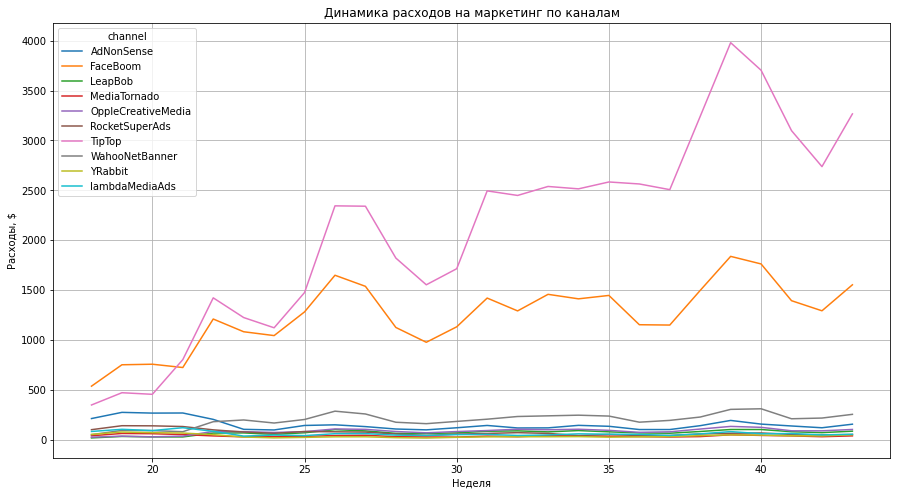

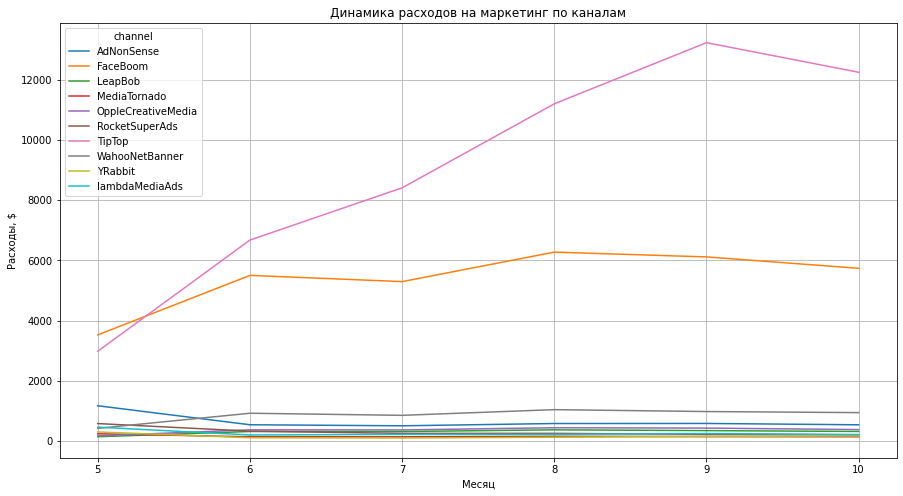

In [24]:
# создаём копию даты в формате datetime для анализа расходов
costs['dt_datetime'] = pd.to_datetime(costs['dt'])

# создание новых столбцов и преобразование типа данных
costs['week'] = costs['dt_datetime'].dt.isocalendar().week
costs['month'] = costs['dt_datetime'].dt.month

# динамики изменения расходов по неделям
costs.pivot_table(
    index='week', columns='channel', values='cost', aggfunc='sum'
).plot(grid=True, figsize=(15, 8))
plt.ylabel('Расходы, $')
plt.xlabel('Неделя')
plt.title('Динамика расходов на маркетинг по каналам')
plt.show()

# динамики изменения расходов по месяцам
costs.pivot_table(
    index='month', columns='channel', values='cost', aggfunc='sum'
).plot(grid=True, figsize=(15, 8))
plt.ylabel('Расходы, $')
plt.xlabel('Месяц')
plt.title('Динамика расходов на маркетинг по каналам')
plt.show()

* Маркетинговый бюджет распределялся крайне неравномерно: основными каналами стали TipTop и FaceBoom, куда уходила основная часть средств.
* По недельным данным видно, что начиная примерно с 22–23 недели, траты по каналам TipTop и FaceBoom значительно растут и держатся на высоком уровне, тогда как остальные источники стабильно остаются низкими. Это подтверждает, что стратегия продвижения была сфокусирована на двух каналах.
* Месячная динамика подтверждает этот тренд: расходы непрерывно росли с мая по сентябрь, достигнув пика в сентябре по каналу TipTop. В октябре наблюдается небольшое снижение, но уровень расходов всё равно значительно выше стартового периода.

**Выводы**: маркетинговая стратегия компании строилась на активном масштабировании инвестиций в TipTop и FaceBoom, тогда как другие каналы практически не развивались. Это указывает на высокую зависимость бизнеса от ограниченного числа источников трафика.

,CAC
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


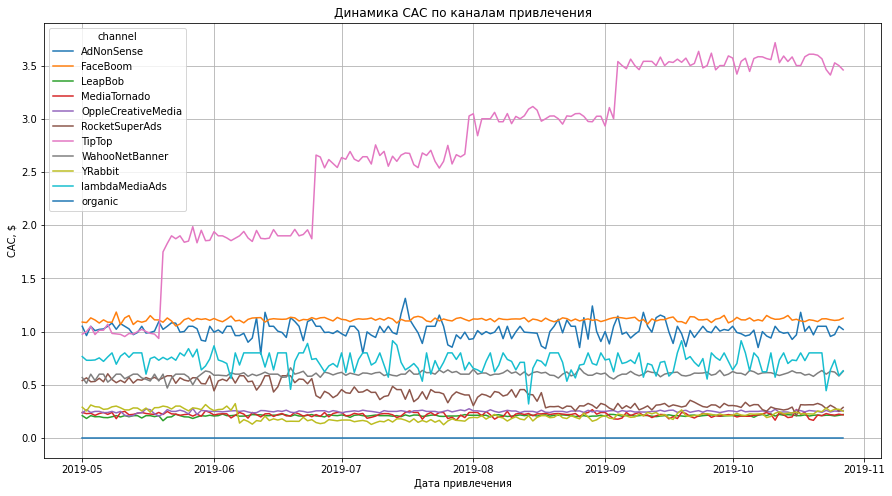

In [25]:
# средний CAC по каждому источнику
avg_cac = (
    profiles.groupby('channel')
    .agg({'CAC': 'mean'})
    .sort_values(by='CAC', ascending=False)
)

display(avg_cac)

# график истории изменений CAC по каналам привлечения
profiles.pivot_table(
    index='dt', columns='channel', values='CAC', aggfunc='mean'
).plot(grid=True, figsize=(15, 8))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

**Средний CAC по источникам**
* Самым дорогим оказался канал TipTop почти 2.8 за пользователя.
* FaceBoom и AdNonSense CAC около 1.
* Самые дешёвые каналы привлечения — LeapBob, MediaTornado, YRabbit (около 0.2).
* У органических пользователей CAC равен нулю (так как нет рекламных расходов).

**Динамика CAC во времени**
* У большинства каналов CAC остаётся относительно стабильным.
* У TipTop заметны скачки и рост затрат — канал сильно дороже остальных.
* У FaceBoom и AdNonSense расходы стабильные, но выше среднего.
* У дешёвых каналов (LeapBob, YRabbit) CAC остаётся низким на протяжении всего периода.


# Промежуточные выводы по маркетингу 

* По результатам анализа видно, что каналы сильно отличаются по стоимости привлечения. Самый дорогой — TipTop, где привлечение одного пользователя обходится почти в 3. На втором месте по дороговизне идут FaceBoom и AdNonSense (около 1). Самыми выгодными оказались LeapBob, MediaTornado и YRabbit — привлечение там стоит примерно 0.2.

* Во времени ситуация в целом стабильная: у большинства каналов стоимость не меняется резко. Исключение — TipTop, где заметны скачки и рост расходов. Органический трафик, как и ожидалось, бесплатный.

* В итоге можно сказать, что часть бюджета уходит в дорогие каналы, хотя есть источники, которые дают пользователей значительно дешевле.

# Анализ окупаемость рекламы

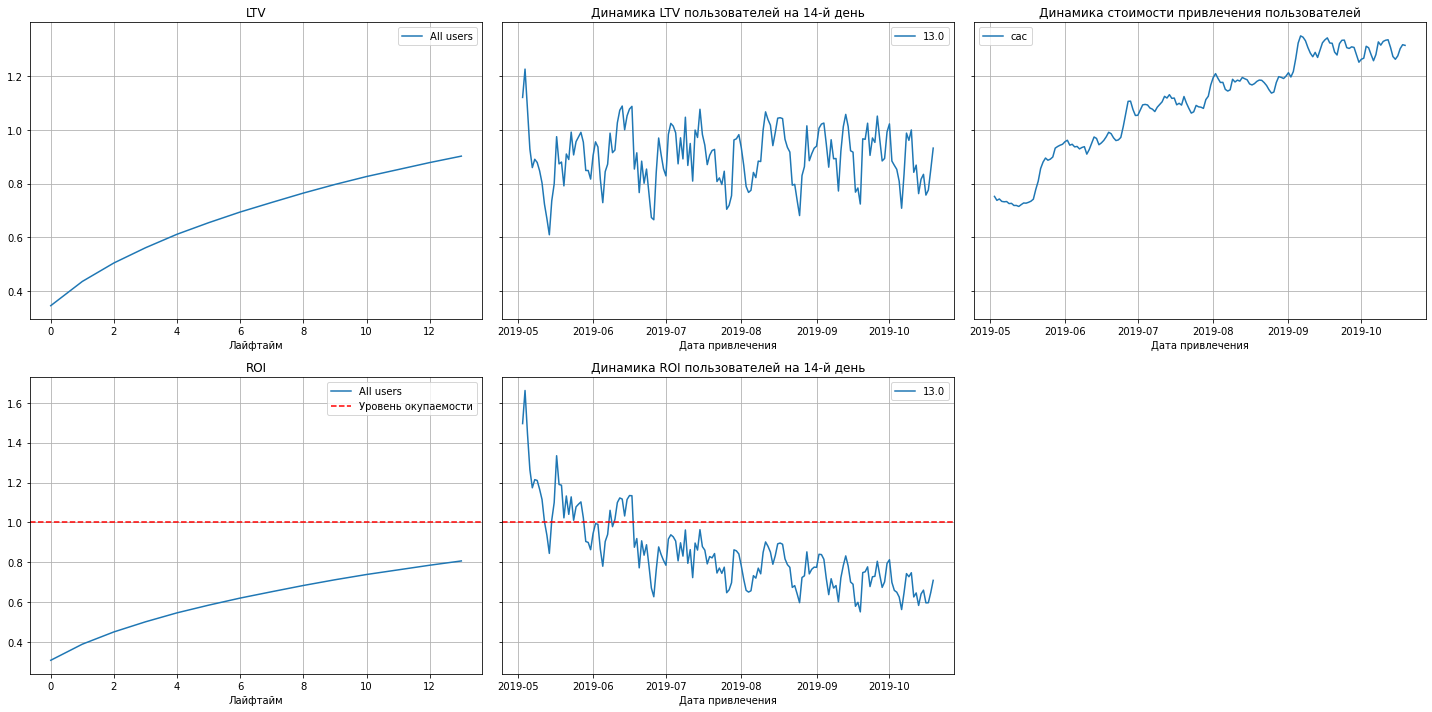

In [26]:
# исключение органических пользователей из таблицы
profiles = profiles.query('channel != "organic"')

# анализ окупаемость рекламы LTV и ROI, динамики LTV, CAC и ROI
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=[]
)

plot_ltv_roi(
    ltv=ltv,
    ltv_history=ltv_history,
    roi=roi,
    roi_history=roi_history,
    horizon=horizon_days,
    window=3
)

**LTV**
- растёт, но остаётся довольно низким: пользователи приносят меньше дохода, чем хотелось бы, и к 14-му дню не достигают уровня, который мог бы перекрыть расходы.

**Динамика CAC**
- со временем растёт — особенно заметно с июня. Получается, что новых пользователей становится дороже привлекать, а отдачи это не приносит.

**Динамика ROI на 14-й день**
- всё время держится ниже единицы. То есть деньги, вложенные в рекламу, не возвращаются в заданный срок (14 дней). В начале ещё были редкие всплески, но потом ROI стабильно ниже порога окупаемости

**Выводы**: реклама в текущем виде убыточна. Мы тратим всё больше на привлечение, а получаем меньше ценности от новых пользователей.

# Расчет конверсии

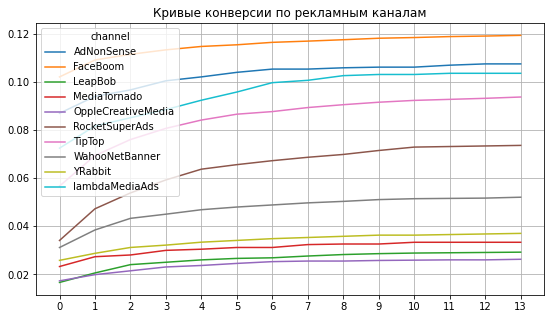

In [27]:
# Конверсия по рекламным каналам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

# строим кривые конверсии по рекламным каналам
plt.figure(figsize = (20, 5))
report = conversion.drop(columns = ['cohort_size'])

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Кривые конверсии по рекламным каналам');

**Конверсия по рекламным каналам**
* Лидеры по конверсии: FaceBoom (~12%), AdNonSense и LambdaMediaAds (~10%).
* Средние показатели: TipTop (~9%), RocketSuperAds (~7%), WahooNetBanner (~5%).
* Аутсайдеры: MediaTornado, OppleCreativeMedia, YRabbit, LeapBob – их конверсия редко превышает 3%.

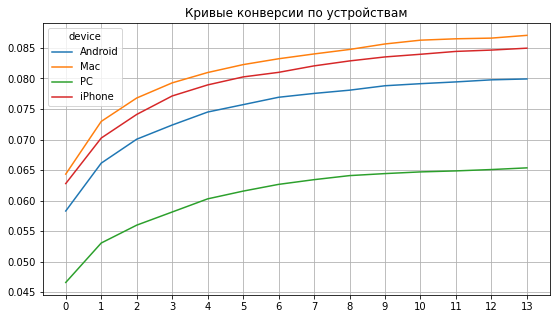

In [28]:
# Конверсия по устройствам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

# строим кривые конверсии по устройствам
plt.figure(figsize = (20, 5))
report = conversion.drop(columns = ['cohort_size'])

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Кривые конверсии по устройствам');

**Конверсия по устройствам**
* Конверсия выше всего у пользователей Mac и iPhone – они стабильно растут и достигают ~8–9%.
* Android показывает средние значения (около 7–8%).
* PC заметно отстаёт: конверсия едва доходит до 6.5% – это самый слабый сегмент.

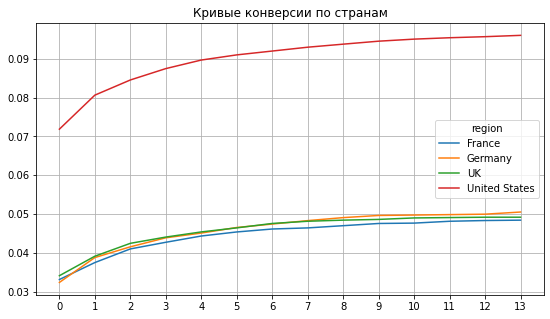

In [29]:
# Конверсия по странам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

# строим кривые конверсии по странам
plt.figure(figsize = (20, 5))
report = conversion.drop(columns = ['cohort_size'])

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Кривые конверсии по странам');

**Конверсия по странам**
* Пользователи из США демонстрируют максимальную конверсию – более 9%.
* Европа (Франция, Германия, UK) отстаёт: значения держатся в районе 4.5–5%.
* Это значит, что американский рынок более конверсионный, чем европейский.

**Общие выводы**
- Конверсия сильно зависит от источника: есть явные «локомотивы» (FaceBoom, AdNonSense), а есть слабые каналы, которые, скорее всего, тянут окупаемость вниз.
- По устройствам тоже видно разделение: мобильные (особенно iPhone/Mac) конвертят лучше, чем PC.
- География играет роль: США — ключевой драйвер конверсии, Европа заметно слабее.

# Расчет удержания

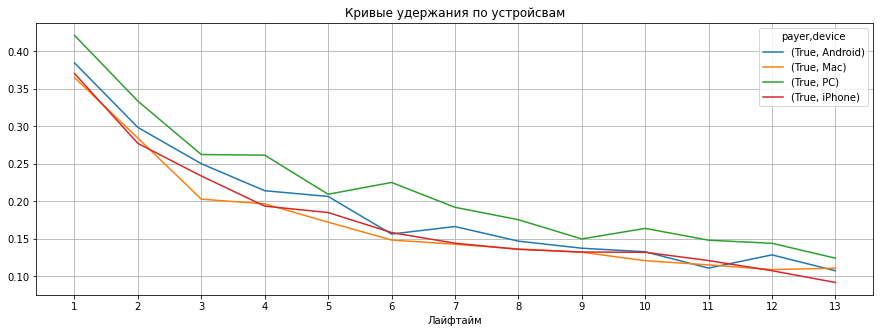

In [30]:
# Удержание по устройствам 
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

# строим кривые удержания по устройсвам 
report = retention.query('payer == True').drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,
    xticks=list(report.columns.values),
    figsize=(15, 5)
)
plt.xlabel('Лайфтайм') 
plt.title('Кривые удержания по устройсвам')
plt.show()

- С графика видно, что лучше всего держатся платящие пользователи на ПК — они дольше остаются активными и к 14-му дню показывают самый высокий уровень удержания.

- У мобильных (и Android, и iPhone) ситуация средняя: стартуют неплохо, но довольно быстро «проседают» и остаётся только ядро лояльных.

- А вот пользователи с Mac удерживаются хуже всех — они быстрее других перестают возвращаться.

**Выводы**: для долгосрочной окупаемости выгоднее ориентироваться на ПК-аудиторию, а вот с Mac стоит разобраться — возможно, там проблемы либо с самим продуктом, либо с качеством трафика.

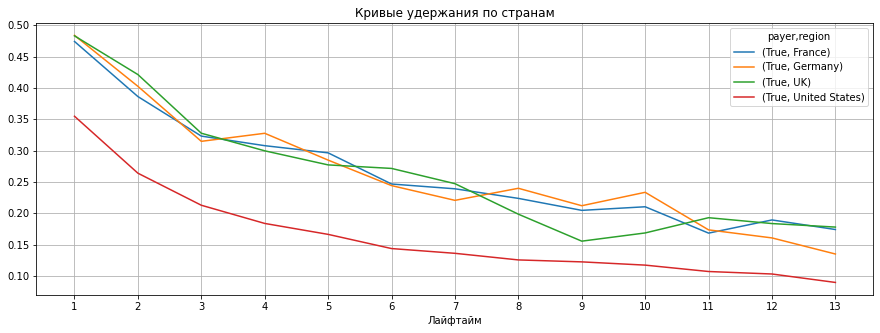

In [31]:
# Удержание по странам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

# строим кривые удержания по странам 
report = retention.query('payer == True').drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,
    xticks=list(report.columns.values),
    figsize=(15, 5)
)
plt.xlabel('Лайфтайм') 
plt.title('Кривые удержания по странам')
plt.show()

- Франция, Германия и UK — пользователи удерживаются примерно одинаково. На старте retention около 48–49%, к 14-му дню падает до ~13–17%. Это типичная динамика: сильное падение в первые дни, дальше остаётся только ядро.
- США заметно выделяются: пользователи здесь быстрее «отваливаются». Уже после первых дней retention сильно ниже, и к концу периода удержание падает до ~9%.

**Вывод**: реклама в США привлекает платящих пользователей хуже — они быстро теряют интерес. Это может быть связано с тем, что трафик дороже, аудитория менее релевантная, либо конкуренция выше

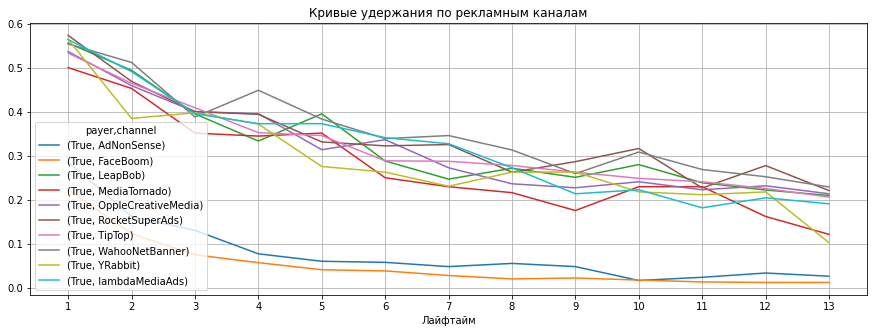

In [32]:
# Удержание по рекламным каналам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)
# строим кривые удержания по устройсвам 
report = retention.query('payer == True').drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,
    xticks=list(report.columns.values),
    figsize=(15, 5)
)
plt.xlabel('Лайфтайм') 
plt.title('Кривые удержания по рекламным каналам')
plt.show()

- Лучшее удержание демонстрируют пользователи, привлечённые через WahooNetBanner и RocketSuperAds — их retention остаётся заметно выше остальных на протяжении всего лайфтайма (держится на уровне ~20–30% к 14-му дню).
- Средняя группа — OppleCreativeMedia, TipTop, LeapBob. Они теряют пользователей быстрее, но ещё сохраняют стабильность на горизонте 2 недель.
- Проблемные каналы — AdNonSense и FaceBoom. Здесь резкое падение: уже к 3–4 дню retention снижается ниже 10%, а к концу почти уходит к нулю. Это явный сигнал, что такие кампании привлекают некачественных пользователей.

**Вывод**: удержание сильно зависит от канала. AdNonSense и FaceBoom, скорее всего, «сливают» бюджет — люди приходят, но не задерживаются. В то же время WahooNetBanner и RocketSuperAds показывают хорошее качество трафика.

# Анализ окупаемость рекламы с разбивкой

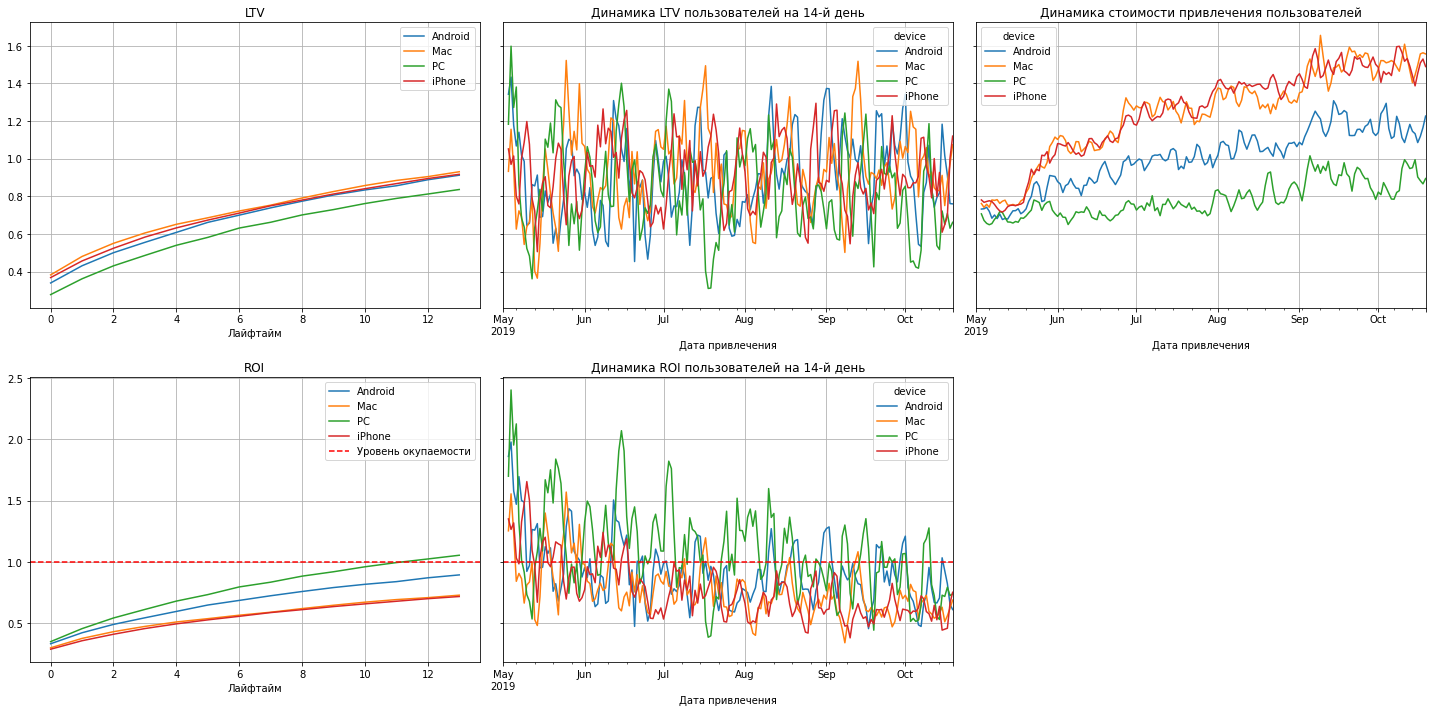

In [33]:
# анализ окупаемость рекламы LTV и ROI с разбивкой по устройствам, динамики LTV, CAC и ROI
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv=ltv,
    ltv_history=ltv_history,
    roi=roi,
    roi_history=roi_history,
    horizon=horizon_days,
    window=3
)

**1. LTV по устройствам**
* Пользователи Mac и iPhone приносят больше денег, чем Android и особенно PC.
* Самые низкие показатели — у PC, хотя там реклама дешевле.

**2. CAC (стоимость привлечения)**
* Стоимость привлечения на Mac и iPhone выше и постоянно растёт.
* Android и PC дешевле, но и доходность пользователей там ниже.

**3. ROI (окупаемость)**
* Только пользователи PC окупаются — ROI стабильно выше 1.
* По Android ситуация близка к точке окупаемости, но всё ещё ниже.
* Mac и iPhone убыточны: высокий CAC не перекрывается LTV.

**4. Динамика**
* С течением времени стоимость привлечения увеличивалась, особенно для Mac и iPhone.
* ROI по многим датам падал ниже 1, что говорит о проблемах в окупаемости кампаний на дорогих устройствах.

**Общий вывод**: реклама в сегменте Mac и iPhone приносит убытки — пользователи дорогие, но не окупаются. Android ближе к нулевой точке, а реклама на PC — самая эффективная: дешевая и при этом окупается.


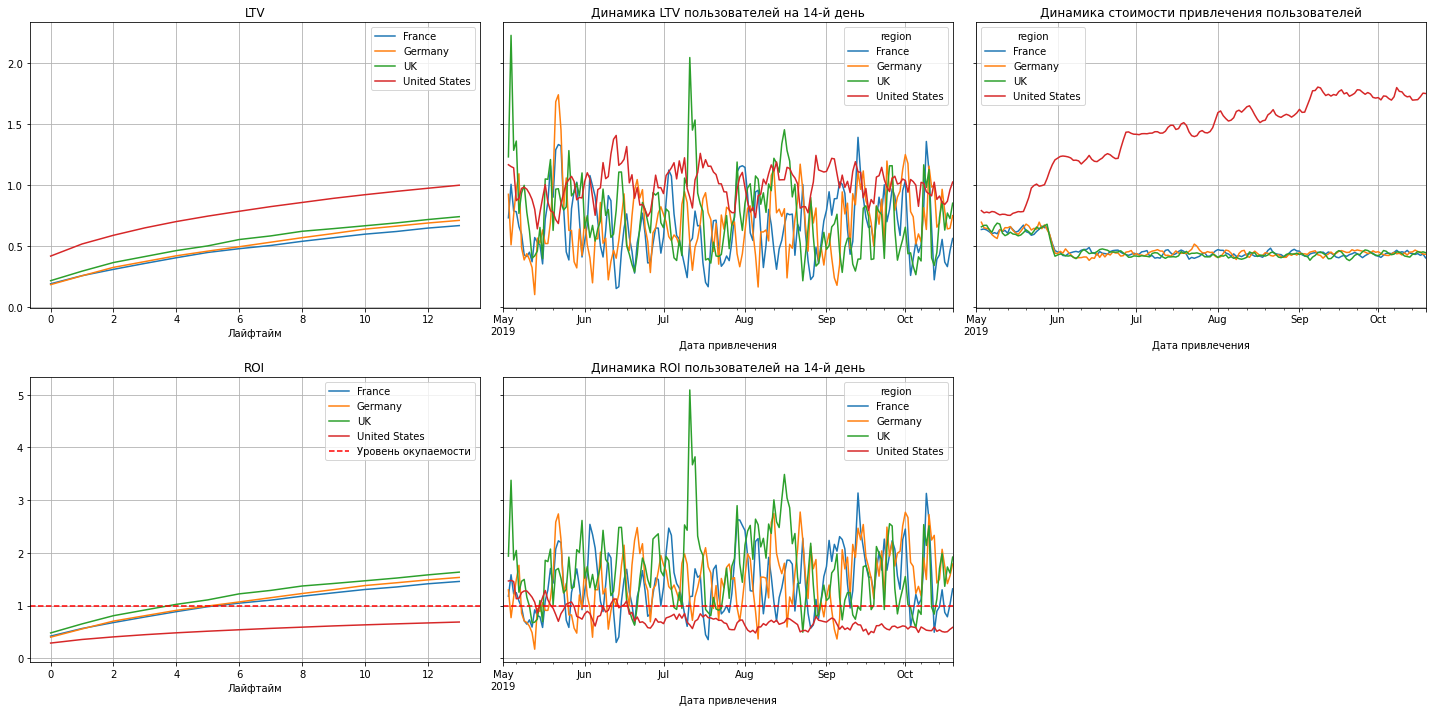

In [34]:
# анализ окупаемость рекламы LTV и ROI с разбивкой по странам, динамики LTV, CAC и ROI
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv=ltv,
    ltv_history=ltv_history,
    roi=roi,
    roi_history=roi_history,
    horizon=horizon_days,
    window=3
)

**LTV**: пользователи из США приносят больше денег, чем пользователи из Франции, Германии и UK.

**CAC**: стоимость привлечения в США сильно выше, чем в Европе. В UK, Германии и Франции расходы примерно одинаковые и стабильные.

**ROI**: хотя пользователи из США имеют высокий LTV, из-за дорогого привлечения реклама там не окупается в течение 14 дней. В то время как во Франции, Германии и UK ROI уверенно превышает 1, и реклама окупается.

**Динамика ROI**: в Европе ROI держится выше уровня окупаемости, а в США остаётся ниже, несмотря на рост LTV.

**Вывод**: реклама в Европе окупается и выглядит эффективной, а в США слишком дорогая — даже при высоком доходе от пользователей.

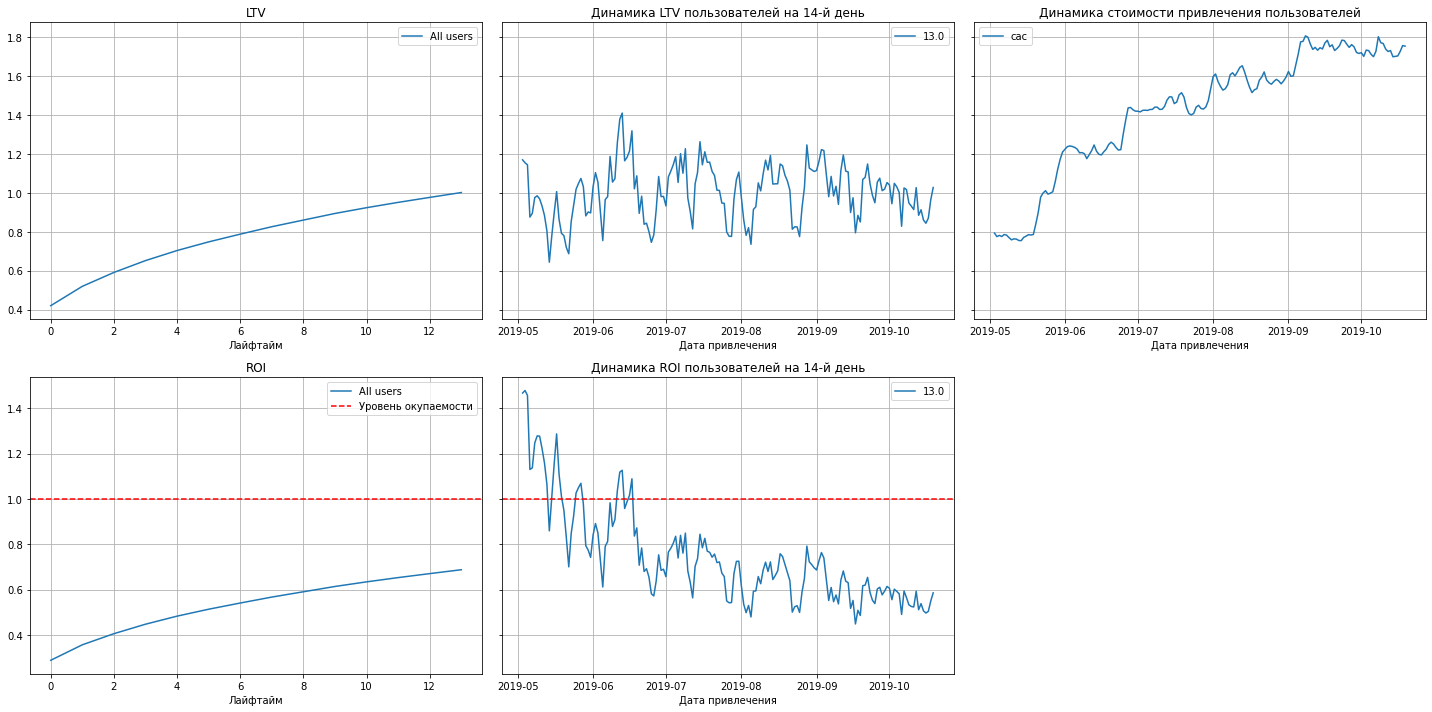

In [35]:
# анализ окупаемости рекламы только в США
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

# фильтруем только пользователей из США
profiles_usa = profiles.query('region == "United States"')

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles_usa,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=horizon_days
)

plot_ltv_roi(
    ltv=ltv,
    ltv_history=ltv_history,
    roi=roi,
    roi_history=roi_history,
    horizon=horizon_days,
    window=3
)

**LTV**
* LTV растёт плавно и к концу 14-го дня достигает чуть выше 1.
* Это значит, что пользователи начинают приносить выручку, но не слишком быстро.

**ROI**
* ROI остаётся ниже 1 в пределах 14 дней, реклама в целом не окупается в заявленный бизнес-горизонт
* Даже к концу периода ROI ≈ 0.7–0.8, что указывает на убыток.

**CAC**
* Стоимость привлечения (CAC) заметно растёт со временем: в начале периода она была ниже, но начиная с июня идёт устойчивый рост. Это напрямую влияет на снижение ROI — привлекать пользователей становится всё дороже.

**Динамика** 
* LTV на 14-й день колеблется, но без выраженного роста. Это говорит о том, что рост выручки от новых когорт не компенсирует рост расходов.

**Динамика ROI** 
* ROI на 14-й день также показывает негативную динамику: кривая в большинстве периодов опускается ниже линии окупаемости.
* Особенно заметны просадки летом и осенью — это связано с ростом CAC при стабильном LTV.

**Выводы:**
* В целом реклама в заданный горизонт 14 дней не окупается.
* Причины: рост CAC при стабильном или слабом росте LTV. Бизнес-план не выполняется: пользователи начинают приносить прибыль позже, чем через 14 дней, а некоторые когорты остаются убыточными.


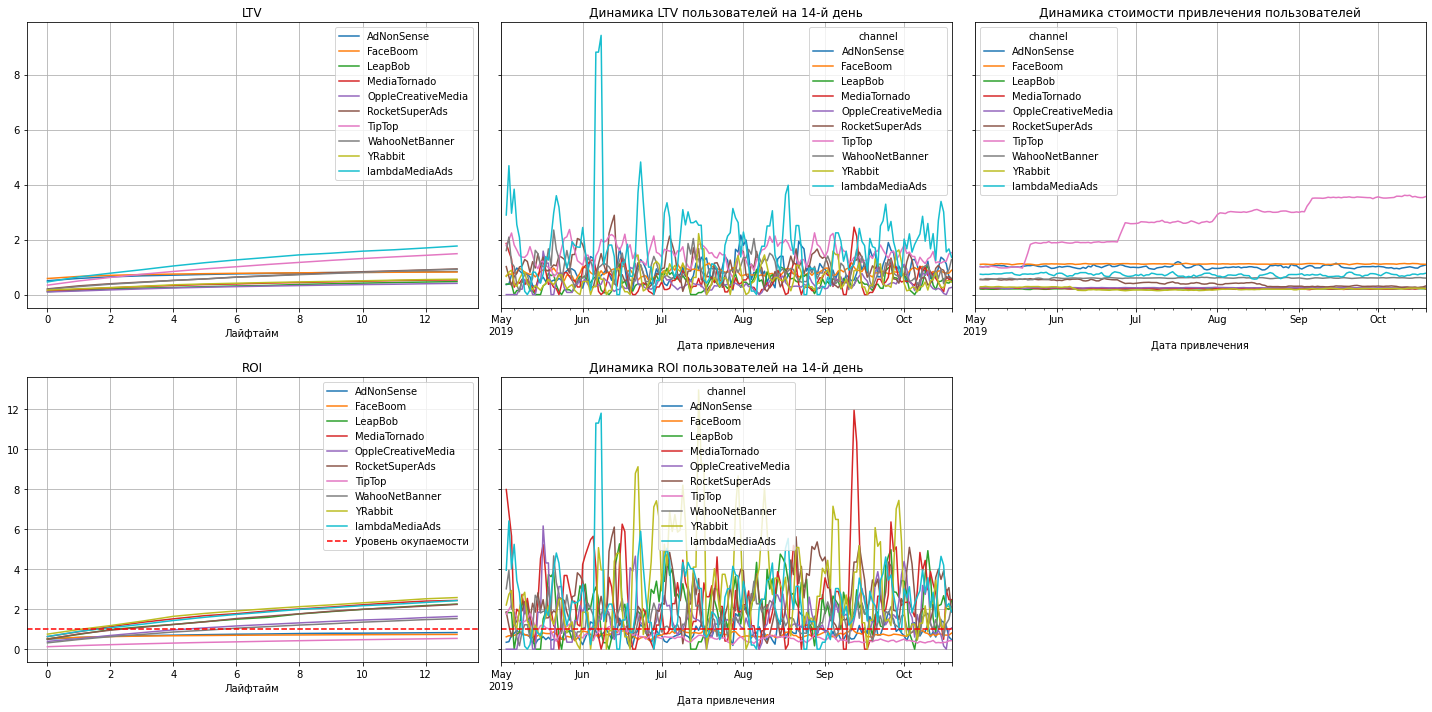

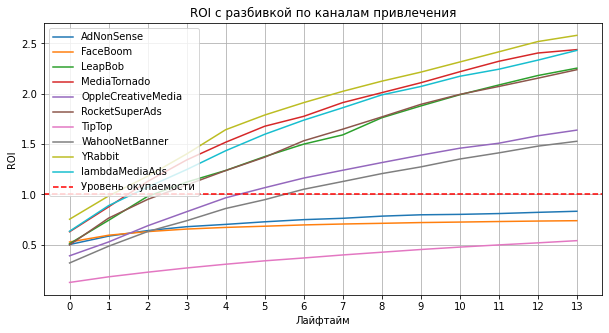

In [36]:
# анализ окупаемость рекламы LTV и ROI с разбивкой по рекламным каналам, динамики LTV, CAC и ROI
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv=ltv,
    ltv_history=ltv_history,
    roi=roi,
    roi_history=roi_history,
    horizon=horizon_days,
    window=3
)
# Удержание по рекламным каналам
retention_raw, retention, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

# Построение большого графика ROI по каналам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])

report = roi.drop(columns=['cohort_size', 'cac'])

# строим кривые ROI
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

**LTV**: сильных различий между каналами нет, но убыточные каналы показывают более низкий рост LTV.

**CAC**: канал TipTop резко выделяется — стоимость привлечения здесь самая высокая и стабильно растёт. У остальных каналов расходы остаются примерно на одном уровне.

**ROI**:
* В проекте есть несколько сильных каналов (YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds), которые можно масштабировать.
* TipTop и FaceBoom — главные провальные источники. При высоких расходах они не окупаются, нужно пересмотреть стратегию: либо отказаться, либо радикально оптимизировать.
* AdNonSense тоже не дотягивает, хотя его убытки не такие критичные, как у TipTop.

**Динамика**: на графиках ROI и LTV заметны скачки — это говорит о зависимости результатов от количества привлечённых пользователей в конкретные даты (например, краткосрочные рекламные кампании).

**Главная проблема** окупаемости связана с FaceBoom и TipTop - они требуют либо оптимизации расходов, либо пересмотра стратегии.

**1. Окупается ли реклама в целом?**
Да, в среднем реклама окупается — по большинству каналов ROI превышает 1 уже в первые 14 дней после привлечения. Это значит, что вложенные деньги возвращаются и начинают приносить прибыль. Однако остаётся ряд исключений: есть каналы и сегменты пользователей, которые системно убыточны и тянут общую эффективность вниз.

**2. Какие устройства, страны и рекламные каналы мешают окупаемости?**

**Устройства**: наименее рентабельные пользователи приходят с ПК: их ROI балансирует на грани нуля. Возможные причины — меньше импульсивных покупок, более низкая конверсия или большая чувствительность к цене.

**Страны**: наибольшие проблемы наблюдаются в странах с низкой платёжеспособностью. Там пользователи совершают меньше покупок и тратят меньше, поэтому даже при невысокой стоимости привлечения такие регионы остаются слабым звеном.

**Рекламные каналы**: основную угрозу окупаемости создают TipTop, FaceBoom и AdNonSense. У них низкий ROI, который даже к 14-му дню не достигает уровня окупаемости. Остальные каналы — показывают положительный ROI и в ряде случаев значительно превышают 2.

**3. Чем могут быть вызваны проблемы окупаемости?**
* Завышенный CAC — например, TipTop привлекает дорогой трафик, который не успевает себя окупить
* Низкое качество аудитории — некоторые каналы приводят пользователей с низкой конверсией или маленьким средним чеком
* Краткосрочные рекламные акции — резкие всплески ROI могут указывать на временные кампании, которые не дают устойчивого эффекта.

# Промежуточные выводы по окупаемости рекламы

**Общая картина**
* В целом реклама не окупается в заданный горизонт 14 дней.
* ROI остаётся ниже 1 для большинства источников, а это значит, что пользователи либо начинают приносить прибыль гораздо позже, либо остаются убыточными.

**По регионам**
- **США** — ключевая проблема окупаемости
  * LTV пользователей высокий — они тратят больше, конверсии хорошие.
  * Но CAC слишком высок, из-за чего ROI остаётся отрицательным.
  * Фактически, пользователи из США убыточны на коротком горизонте


- **Европа (UK, Германия, Франция)**
  * Конверсии ниже, чем в США, но CAC существенно меньше.
  * ROI выходит в плюс быстрее, часть сегментов окупается даже в пределах 14 дней.
  * Это более сбалансированный рынок для рекламы.
  
**По устройствам**
- **PC**
  * Конверсии ниже, но за счёт низкого CAC пользователи окупаются быстрее.
  * Это перспективный сегмент для удержания вложений.


- **iPhone и Mac**
  * CAC выше, LTV растёт медленнее.
  * В итоге ROI хуже, пользователи не успевают окупаться в срок.


- **Android**
  * Средние показатели по всем метрикам.
  * Потенциально можно усиливать фокус на этом сегменте, т.к. расходы здесь сбалансированы.
  
**По рекламным каналам**

- **Окупающиеся каналы**:
  * YRabbit, lambdaMediaAds, MediaTornado, OppleCreativeMedia, LeapBob, RocketSuperAds, WahooNetBanner
  * Особенно выделяется YRabbit (ROI ≈ 2.6), а также lambdaMediaAds и MediaTornado, LeapBob, RocketSuperAds — ROI больше 2.


- **Не окупающиеся каналы** 
  * AdNonSense (≈0.9), FaceBoom (≈0.75), TipTop (≈0.55).
  * TipTop — наиболее проблемный: высокий CAC и низкий ROI, фактически «сливает» бюджет

# Выводы:

В исследовании проанализированы данные по пользователям приложения Procrastinate Pro+ в разрезе стран, устройств и рекламных каналов.

**Основные результаты анализа:**
**Страны**
- США дают высокий объём трафика и лучшие показатели по конверсии и LTV, но реклама здесь не окупается. Причина — самый высокий CAC и более слабое удержание по сравнению с Европой. ROI стабильно ниже 1, даже на горизонте 14 дней.
- Европа (UK, Германия, Франция) показывает более низкие конверсии, но здесь CAC значительно дешевле, удержание стабильнее, поэтому ROI быстро выходит выше уровня окупаемости. Эти страны можно рассматривать как ключевые «точки роста».

**Устройства**
- PC — самый эффективный сегмент: низкий CAC, хорошее удержание, быстрый выход в окупаемость.
- Android — средние результаты, ближе к PC по динамике, но хуже по удержанию.
- iPhone и Mac — самые убыточные устройства: высокая стоимость привлечения, низкое удержание и замедленный рост LTV → ROI остаётся ниже 1.

**Каналы**
Не окупаются:
- FaceBoom — высокая конверсия, но слишком дорогой CAC → бюджет уходит в минус.
- AdNonSense — неплохая конверсия, но очень слабое удержание → пользователи быстро уходят, LTV не растёт.
- TipTop — рекордно высокий CAC и низкая отдача → один из главных источников убытков.
Не рекомендуется масштабировать:
- YRabbit — высокий ROI, но очень низкая конверсия. Увеличение бюджета с большой вероятностью превратит этот канал в новый TipTop.
Эффективные каналы:
- RocketSuperAds, lambdaMediaAds, WahooNetBanner, MediaTornado — ROI стабильно выше 1, хорошие показатели удержания и конверсии. Это основные кандидаты для увеличения инвестиций.

**Рекомендации для отдела маркетинга**

**По странам**

Причина: CAC в США самый высокий и постоянно растёт, удержание пользователей ниже, чем в Европе. Несмотря на высокий LTV и конверсию, ROI стабильно остаётся ниже 1.
Рекомендация: сократить рекламные бюджеты в США. Оставить тестовые кампании на PC и Android (они показывают лучший ROI внутри страны). Перенести акцент с дорогих рынков (Нью-Йорк, Калифорния) на более дешёвые регионы — это может снизить CAC.

**Европа (UK, Германия, Франция)**

Причина: CAC здесь в 2–3 раза ниже, чем в США. Удержание выше, пользователи возвращаются чаще, а ROI уверенно пересекает уровень окупаемости.
Рекомендация: увеличить рекламные бюджеты на Европу. Сфокусироваться на UK и Германии как наиболее перспективных странах. Дополнительно можно протестировать локальные рекламные сети — это ещё больше снизит стоимость привлечения.

**По устройствам**

**PC**
Причина: низкий CAC, хорошее удержание, пользователи быстро начинают приносить прибыль → ROI выше всех.
Рекомендация: увеличить закупку трафика на PC, это наиболее надёжный сегмент для быстрой окупаемости.

**Android**
Причина: средний уровень затрат и ROI. Удержание ниже, чем на PC, но всё же лучше, чем у iPhone/Mac.
Рекомендация: поддерживать рекламу на среднем уровне. Можно пробовать сегментировать по возрасту/доходу, чтобы найти подгруппы с более высоким ROI.

**iPhone и Mac**
Причина: высокая стоимость привлечения + низкое удержание = ROI ниже 1 даже при длительном периоде.
Рекомендация: сократить бюджеты на iPhone и Mac. Если реклама на iOS важна, стоит протестировать другие форматы — например, через premium-подписки или сотрудничество с App Store.

**По каналам**

**TipTop**
Причина: самый высокий CAC (самый дорогой канал), при этом ROI остаётся ниже 1. Графики показывают «слив бюджета».
Рекомендация: сократить или заморозить бюджеты в TipTop.

**FaceBoom**
Причина: конверсия высокая, но стоимость привлечения слишком велика, удержание слабое → ROI остаётся ниже 1.
Рекомендация: ограничить бюджеты в FaceBoom, протестировать только узкие сегменты (например, таргетинг на PC в Европе).

**AdNonSense**
Причина: неплохая конверсия, но очень низкое удержание. Пользователи быстро уходят → LTV не успевает вырасти.
Рекомендация: остановить масштабирование, протестировать другие форматы (видео или баннеры), чтобы проверить, изменится ли удержание.

**YRabbit**
Причина: ROI выглядит высоким, но конверсия крайне низкая. Масштабирование приведёт к повторению ситуации с TipTop (бюджет будет тратиться, а пользователей мало).
Рекомендация: не увеличивать бюджет. Использовать как вспомогательный канал, но не как ключевой.

**Эффективные каналы** (RocketSuperAds, lambdaMediaAds, WahooNetBanner, MediaTornado)
Причина: ROI выше 1, удержание и конверсии на хорошем уровне. Эти каналы стабильно приносят прибыль.
Рекомендация: увеличить бюджеты на эти каналы. Особенно RocketSuperAds и lambdaMediaAds, так как у них ROI растёт быстрее остальных.

**Общие меры**
Причина: главная проблема в общем виде — дисбаланс между стоимостью привлечения и удержанием. Там, где CAC слишком высокий, реклама не успевает окупиться.
Рекомендации:
- Перераспределить бюджет из США и неэффективных каналов (TipTop, FaceBoom, AdNonSense) в Европу, PC и каналы с ROI > 1.
- Усилить retention-маркетинг: бонусы, push-уведомления, скидки для «новичков» помогут повысить LTV и ускорить окупаемость.
- Ввести лимиты на CAC по каждому каналу — если канал начинает выходить за пределы, бюджеты автоматически сокращаются.